In [154]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv("BlackFriday.csv")

In [157]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [162]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

df.isnull().sum()

In [165]:
del df['Product_Category_2']

In [167]:
del df['Product_Category_3']

In [169]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

## Finding the unuqiue data for each column:---

In [172]:
df['User_ID'].nunique()

5891

In [174]:
df['Product_ID'].nunique()

3623

In [176]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [178]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

USing loops to get all columns unique values...

In [181]:
for cloumns in df.columns:
    print(df[cloumns].nunique() , ":" , cloumns)

5891 : User_ID
3623 : Product_ID
2 : Gender
7 : Age
21 : Occupation
3 : City_Category
5 : Stay_In_Current_City_Years
2 : Marital_Status
18 : Product_Category_1
17959 : Purchase


## working on Gender

In [184]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

<Axes: >

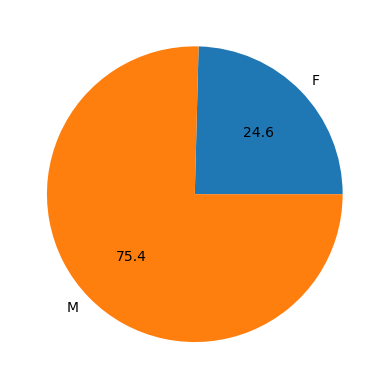

In [186]:
df.groupby('Gender').size().plot(kind = 'pie' , autopct='%.1f')

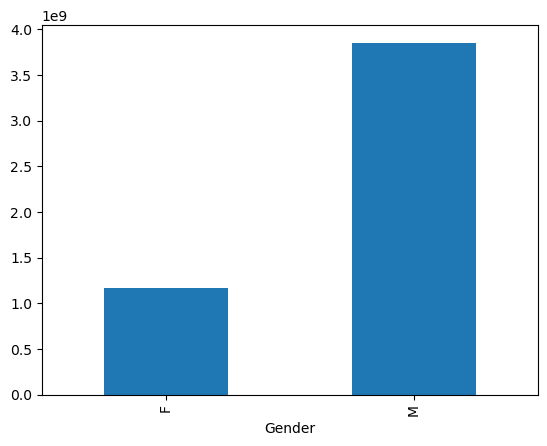

In [187]:
gender_purchase = df.groupby('Gender')['Purchase'].sum().plot(kind = 'bar' )

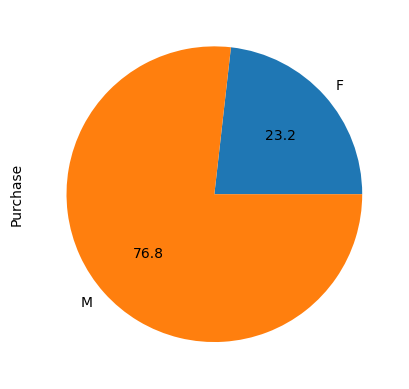

In [189]:
gender_purchase = df.groupby('Gender')['Purchase'].sum().plot(kind = 'pie' , autopct = '%.1f' )

In [191]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Age'>

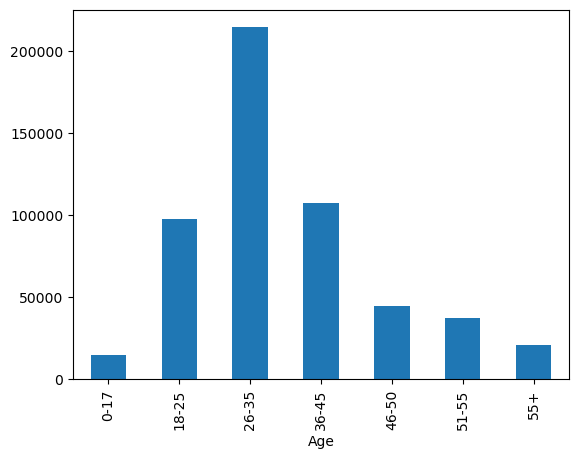

In [194]:
df.groupby('Age').size().plot(kind = 'bar')

## Amount spend on age

<Axes: xlabel='Age'>

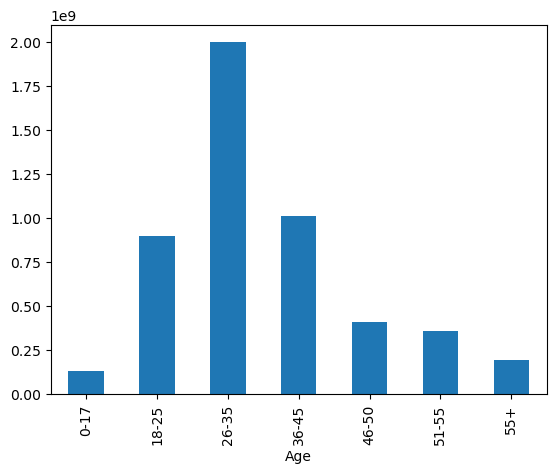

In [197]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar' , x = "Age" , y = "Purchase")

## Average age spending on each purchase

<Axes: xlabel='Age'>

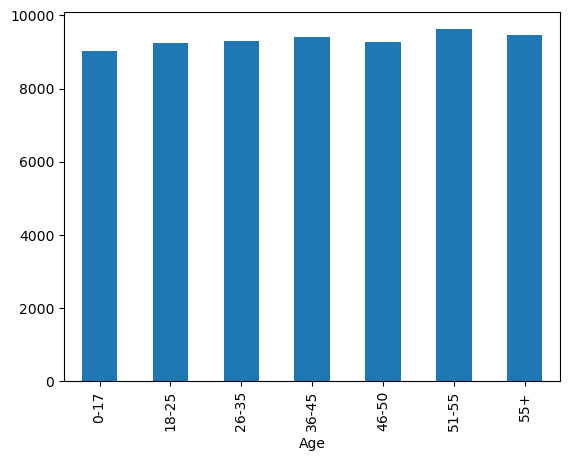

In [200]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar' , x = "Age" , y = "Purchase")

Data Format:--

In [203]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

In [205]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: ylabel='Marital_Status'>

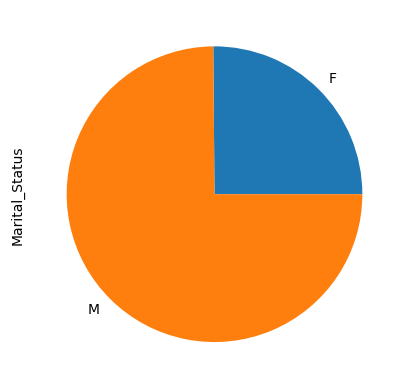

In [207]:
df.groupby('Gender')['Marital_Status'].sum().plot(kind = 'pie')

<Axes: ylabel='Purchase'>

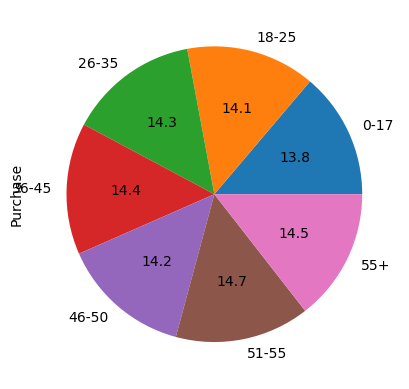

In [209]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f')


<Axes: >

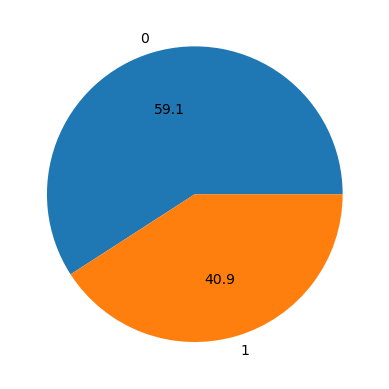

In [210]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

In [212]:
df.groupby('Marital_Status').size()

Marital_Status
0    317817
1    219760
dtype: int64

### Finding the martial status on each age group

<Axes: xlabel='Age'>

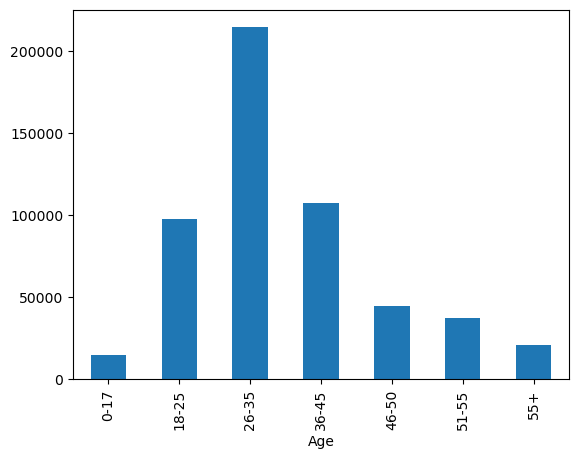

In [216]:
df.groupby('Age')['Marital_Status'].size().plot(kind = 'bar')

## purchase id by age wise

<Axes: xlabel='Age'>

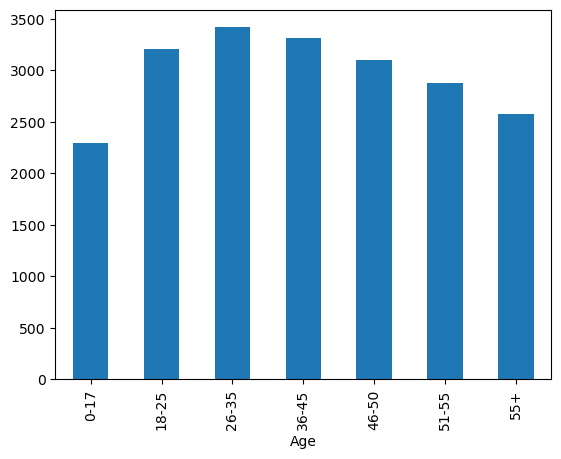

In [219]:
df.groupby('Age')['Product_ID'].nunique().plot.bar()

In [220]:
df.groupby('Age')['Product_ID'].nunique()

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

### Working on Age

In [223]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<Axes: >

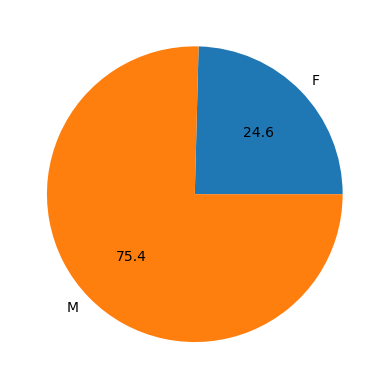

In [226]:
df.groupby('Gender').size().plot(kind = 'pie' , autopct = '%.1f')

<Axes: xlabel='Gender'>

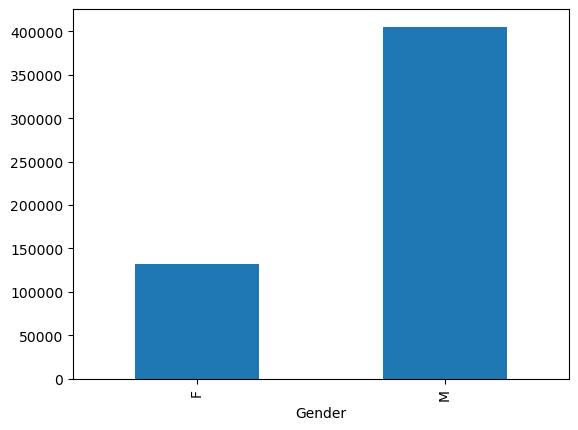

In [227]:
df.groupby('Gender').size().plot(kind = 'bar')

Multi Columns Analysis :-

In [231]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Age'>

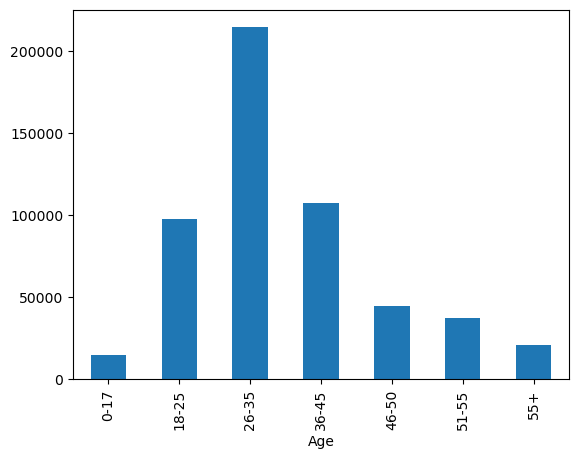

In [233]:
df.groupby('Age').size().plot.bar( x = "Age" , y= "Purchase")

<Axes: xlabel='Age', ylabel='count'>

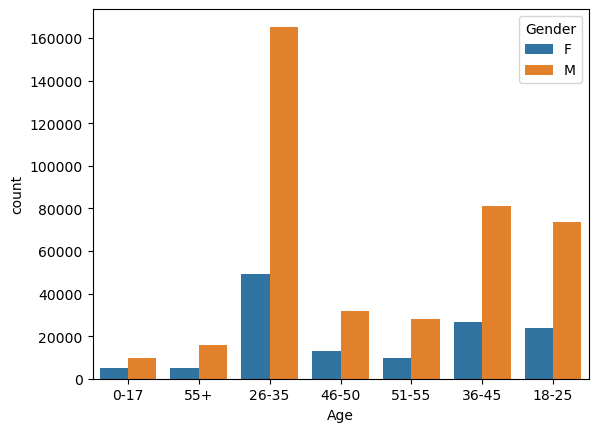

In [234]:
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Age', ylabel='count'>

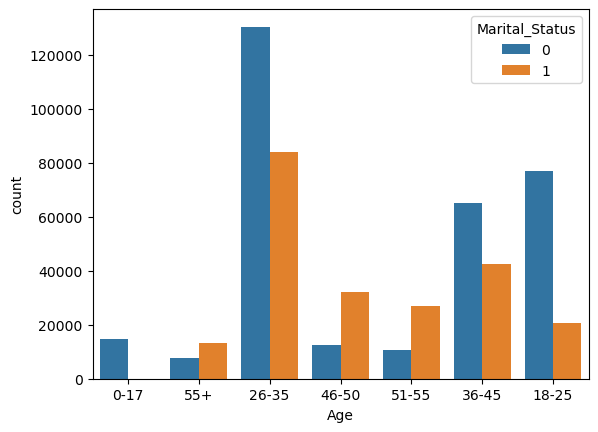

In [236]:
sns.countplot(x = 'Age' , hue ='Marital_Status', data = df)

In [237]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Marital_Status', ylabel='count'>

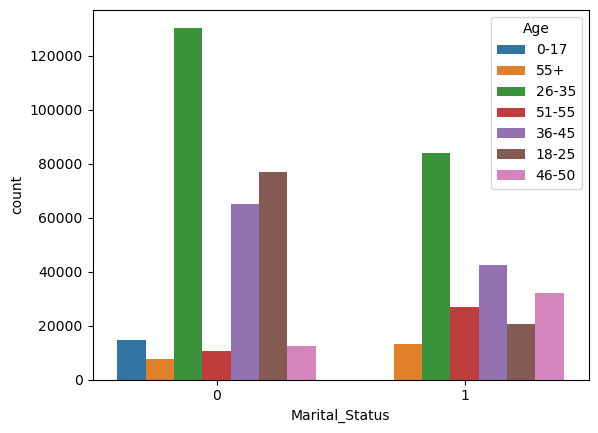

In [238]:
sns.countplot(x = 'Marital_Status' , hue = 'Age' ,  data = df)

<Axes: xlabel='Age', ylabel='count'>

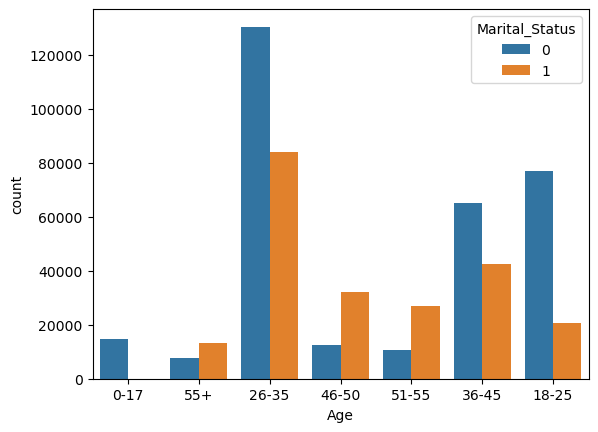

In [239]:
sns.countplot(x = 'Age' , hue = 'Marital_Status' ,  data = df)

<Axes: xlabel='City_Category', ylabel='count'>

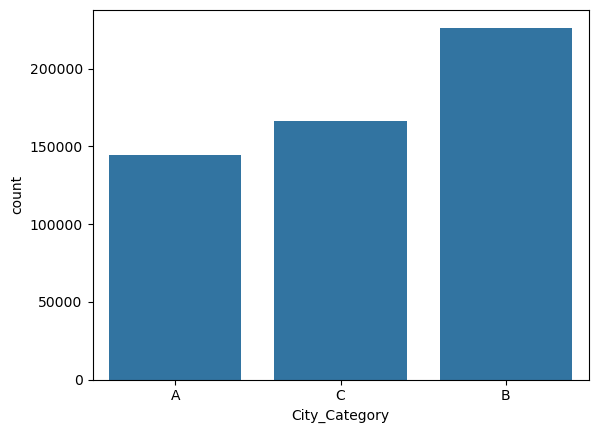

In [240]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

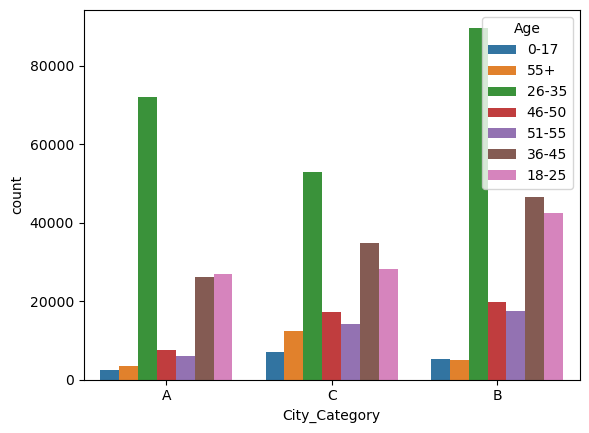

In [241]:
sns.countplot(x = 'City_Category' , hue = 'Age',  data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

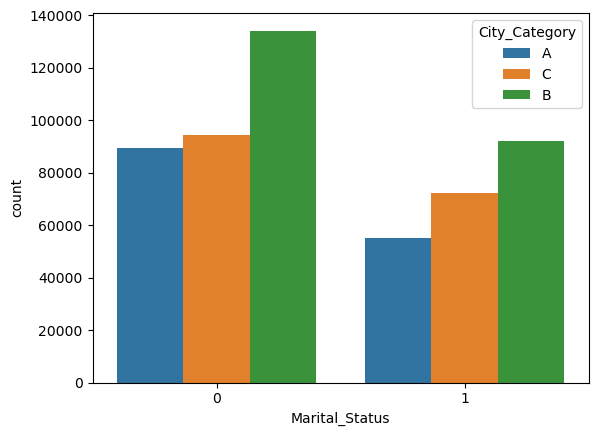

In [242]:
sns.countplot(x = 'Marital_Status' , hue = 'City_Category' ,  data = df)

In [243]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Gender', ylabel='count'>

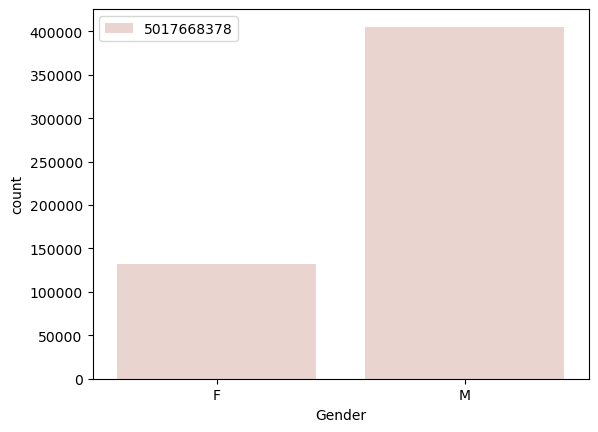

In [244]:
sns.countplot(x = 'Gender' ,  hue = df['Purchase'].sum(), data = df)

<Axes: ylabel='Purchase'>

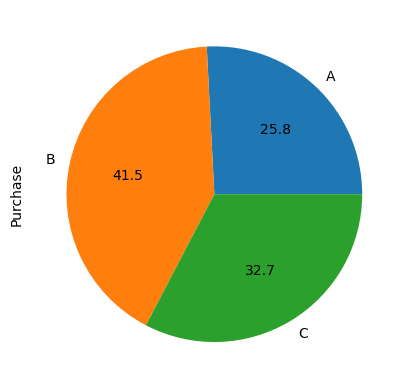

In [245]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = "%0.1f")

<Axes: ylabel='Purchase'>

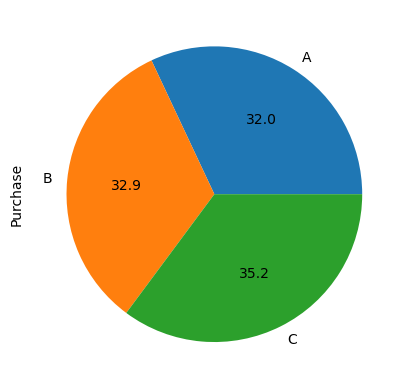

In [246]:
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.1f")

<Axes: xlabel='Gender', ylabel='count'>

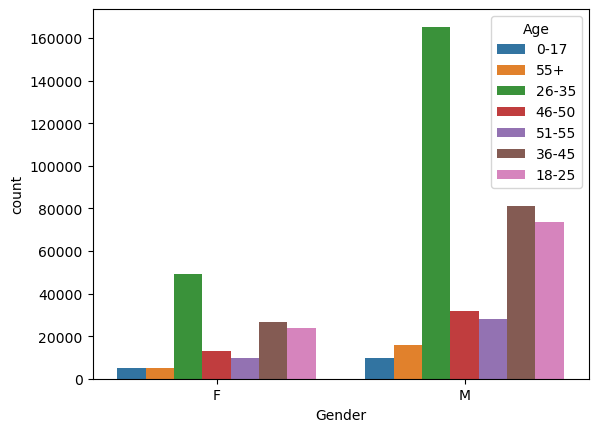

In [247]:
sns.countplot(x = "Gender", hue = 'Age', data = df)

##  Occupation and Products Analysis.

In [249]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Occupation', ylabel='count'>

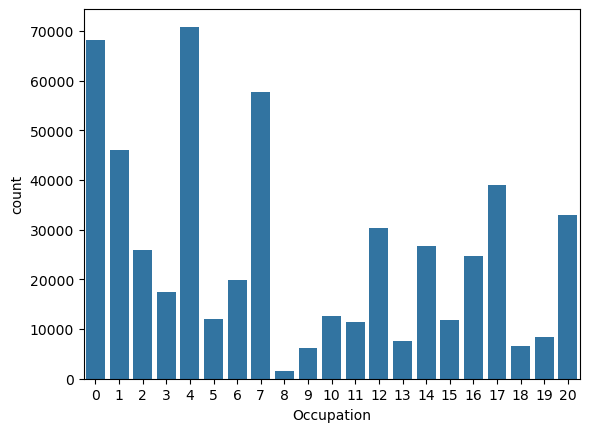

In [250]:
sns.countplot( x = df['Occupation'])

In [251]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

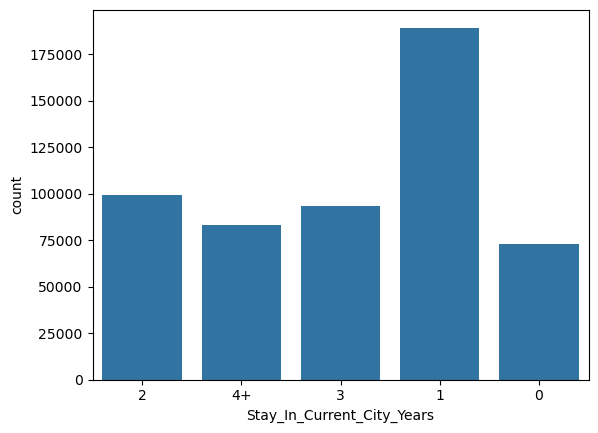

In [252]:
sns.countplot( x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

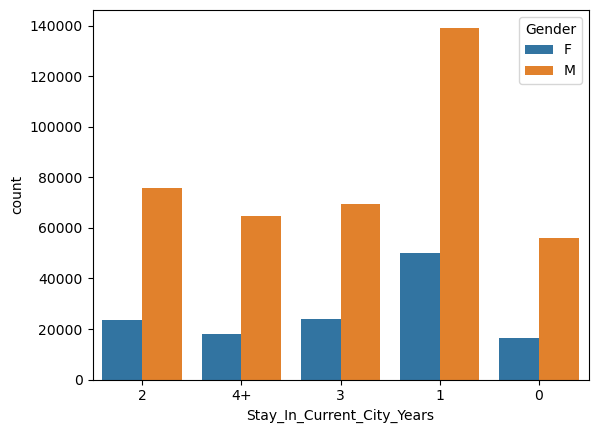

In [254]:
sns.countplot( x = df['Stay_In_Current_City_Years'] ,  hue = 'Gender' ,  data = df)

In [255]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Stay_In_Current_City_Years'>

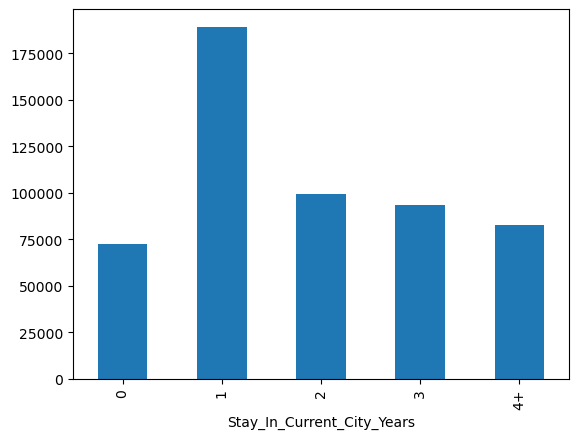

In [256]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'bar')

<Axes: >

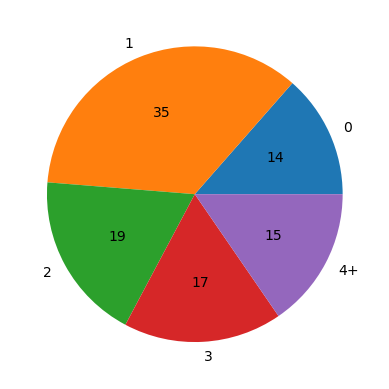

In [257]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie' ,  
                                                     autopct = '%2.f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

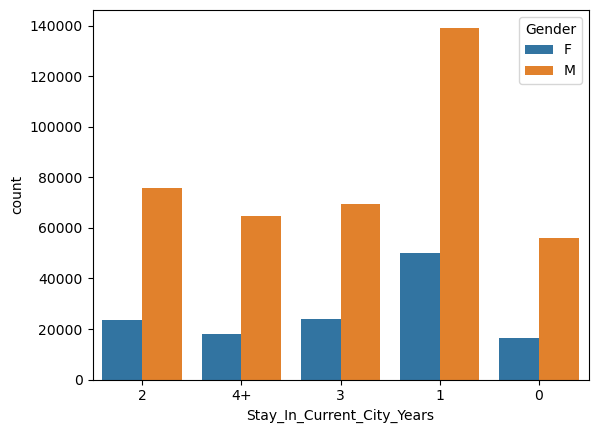

In [258]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

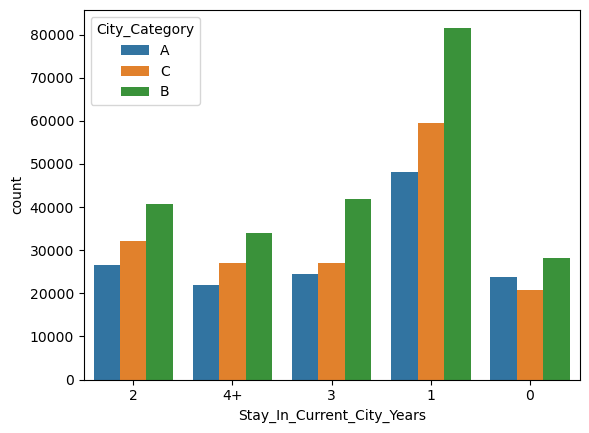

In [259]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

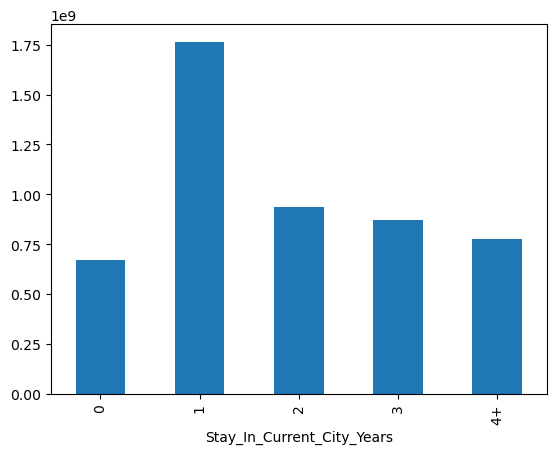

In [260]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar')

In [261]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Occupation'>

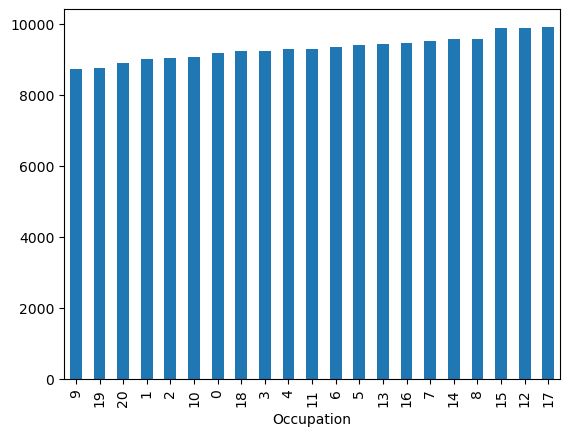

In [270]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

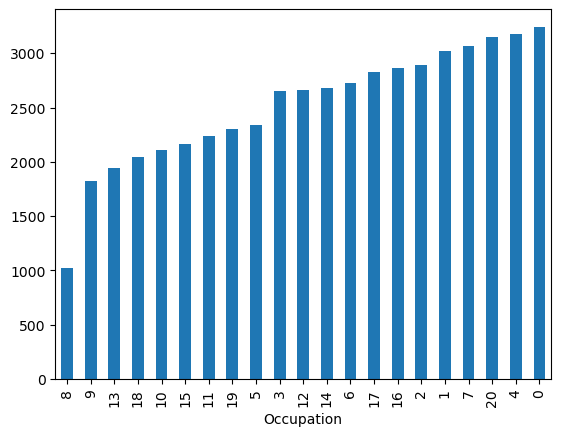

In [282]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

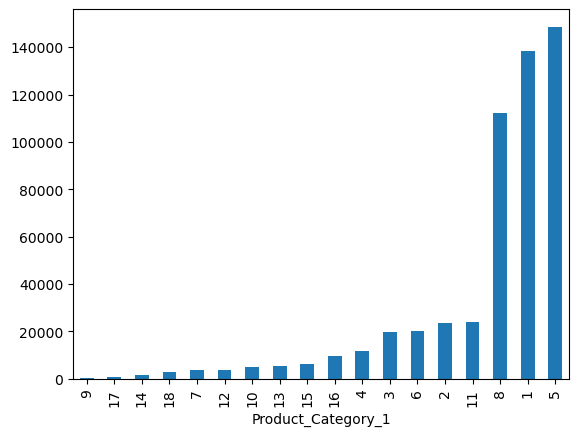

In [284]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

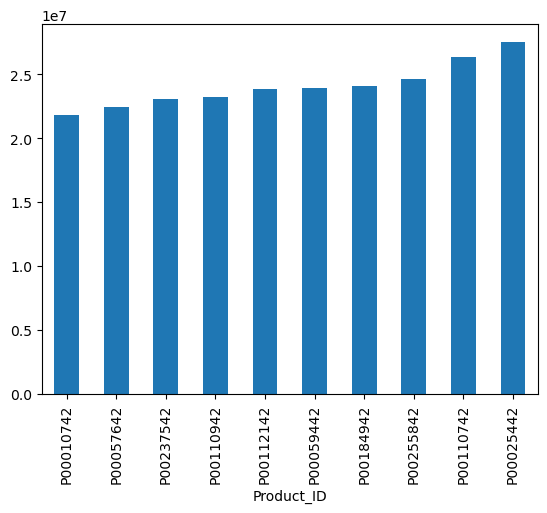

In [286]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Marital_Status', ylabel='count'>

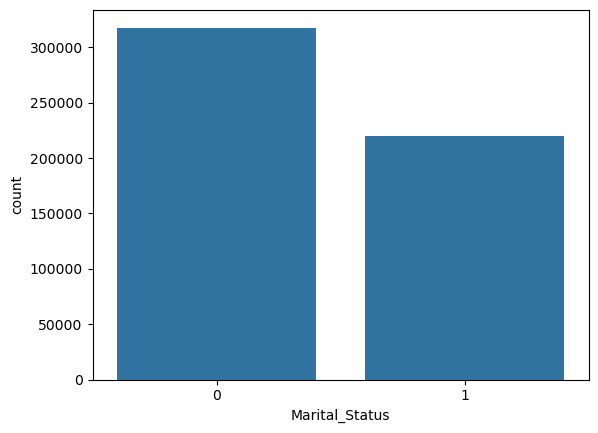

In [290]:
sns.countplot(x = df['Marital_Status'])

<Axes: xlabel='Marital_Status', ylabel='count'>

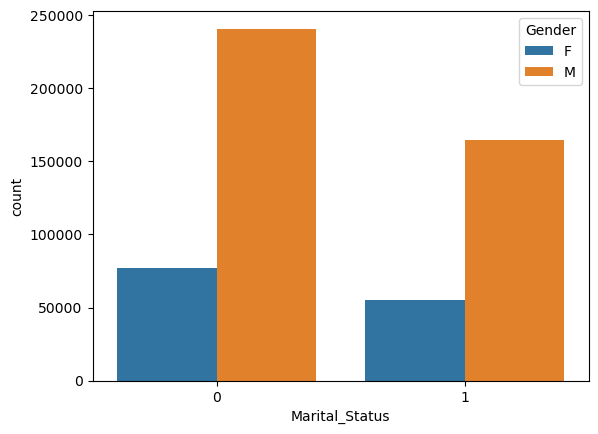

In [292]:
sns.countplot(x='Marital_Status' , hue='Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

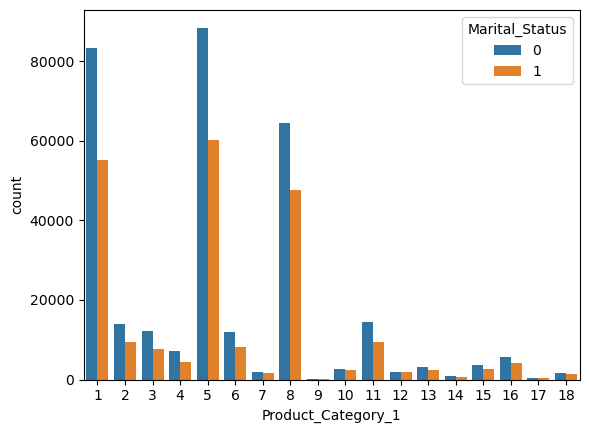

In [301]:
sns.countplot(x = df['Product_Category_1'], hue = df['Marital_Status'])